In [1]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Hanya\\Downloads'

In [5]:
#import dataset
train = pd.read_csv('C:\\Users\\Ynes\\Downloads\stroke_train.csv')

In [6]:
#find count of categories in work_type
train.gender.value_counts()

#create dummy variables
gender_dummies = pd.get_dummies(train.gender, prefix='gender').iloc[:, 1:]

# concatenate columns
pd.concat([train, gender_dummies], axis=1)
train = pd.get_dummies(train, columns=['gender'], drop_first=True)

#find count of categories in work_type
train.Residence_type.value_counts()

#create dummy variables
residence_dummies = pd.get_dummies(train.Residence_type, prefix='residence').iloc[:, 1:]

# concatenate columns
pd.concat([train, residence_dummies], axis=1)
train = pd.get_dummies(train, columns=['Residence_type'], drop_first=True)

#find count of categories in work_type
train.ever_married.value_counts()

#create dummy variables
married_dummies = pd.get_dummies(train.ever_married, prefix='ever_married').iloc[:, 1:]

# concatenate columns
pd.concat([train, married_dummies], axis=1)
train = pd.get_dummies(train, columns=['ever_married'], drop_first=True)

#find count of categories in work_type
train.work_type.value_counts()

#create dummy variables
work_dummies = pd.get_dummies(train.work_type, prefix='work_type').iloc[:, 1:]

# concatenate columns
pd.concat([train, work_dummies], axis=1)
dummy_train = pd.get_dummies(train, columns=['work_type'], drop_first=True)

#drop NaN smoking_status rows from dataset
dummy_train.dropna(subset=["smoking_status"], inplace=True)

#create dummy variables
smoking_dummies = pd.get_dummies(dummy_train.smoking_status, prefix='smoking_status').iloc[:, 1:]

#concatenate columns
pd.concat([dummy_train, smoking_dummies], axis=1)
clean_trains = pd.get_dummies(dummy_train, columns=['smoking_status'], drop_first=True)

#Replace all NaN values in bmi with the mean
mean_value = clean_trains['bmi'].mean()
clean_trains['bmi'] = clean_trains['bmi'].fillna(mean_value)

clean_trains.isnull().sum()

id                             0
age                            0
hypertension                   0
heart_disease                  0
avg_glucose_level              0
bmi                            0
stroke                         0
gender_Male                    0
gender_Other                   0
Residence_type_Urban           0
ever_married_Yes               0
work_type_Never_worked         0
work_type_Private              0
work_type_Self-employed        0
work_type_children             0
smoking_status_never smoked    0
smoking_status_smokes          0
dtype: int64

In [7]:
from sklearn.neighbors import KNeighborsClassifier
X = clean_trains.drop("stroke",axis=1)
y = clean_trains["stroke"]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=101)

In [8]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [9]:
predictions = knn_model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7350
           1       0.08      0.06      0.06       177

    accuracy                           0.96      7527
   macro avg       0.53      0.52      0.52      7527
weighted avg       0.96      0.96      0.96      7527



In [10]:
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[7227  123]
 [ 167   10]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7350
           1       0.08      0.06      0.06       177

    accuracy                           0.96      7527
   macro avg       0.53      0.52      0.52      7527
weighted avg       0.96      0.96      0.96      7527



In [12]:
import seaborn as sns

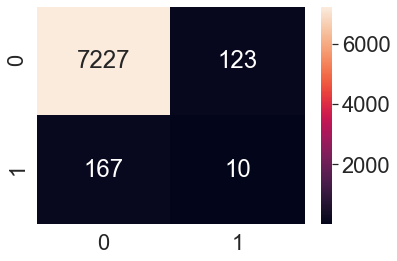

In [13]:
sns.set(font_scale=2.0)
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

In [14]:
print("Accuracy :",knn_model.score(X_test,y_test)*100)

Accuracy : 96.14720340108941


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
X1,X2,y1,y2 = train_test_split(X,y,random_state=0,train_size=0.2)
y2_model = knn_model.fit(X1,y1).predict(X2)
y1_model = knn_model.fit(X2,y2).predict(X1)

print(accuracy_score(y1,y1_model))
print(accuracy_score(y2,y2_model))

0.9599734263411394
0.9638809316228671


In [17]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,20):
    
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

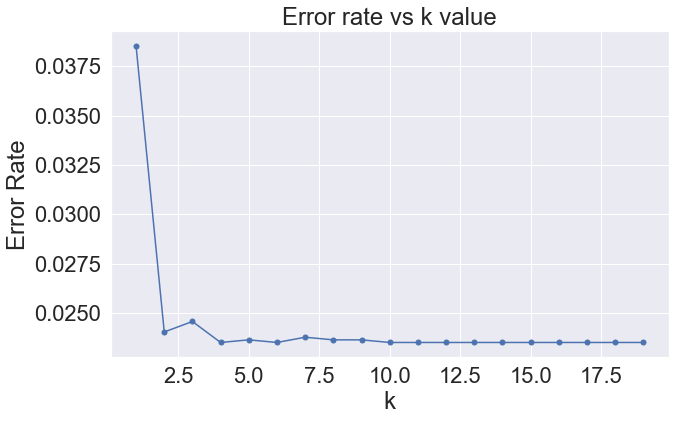

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,marker='o',markersize=5)
plt.title('Error rate vs k value')
plt.xlabel('k')
plt.ylabel('Error Rate')

Accuracy : 97.63518001859971
[[7349    1]
 [ 177    0]]


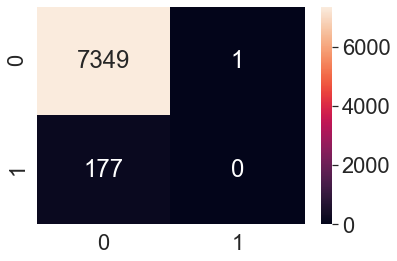

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
pred = knn_model.predict(X_test)
print("Accuracy :",knn_model.score(X_test,y_test)*100)
cm = confusion_matrix(y_test,pred)
print(cm)
sns.set(font_scale=2.0)
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

In [29]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[7349    1]
 [ 177    0]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7350
           1       0.00      0.00      0.00       177

    accuracy                           0.98      7527
   macro avg       0.49      0.50      0.49      7527
weighted avg       0.95      0.98      0.96      7527

